In [55]:
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

# Load in data and sanity checks

In [2]:
crashes_df = pd.read_csv("accidents_2015.csv")
pd.set_option('display.max_columns', 500)
crashes_df.shape

(32538, 70)

In [3]:
crashes_df.head()

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,county,city,day_of_crash,month_of_crash,year_of_crash,day_of_week,hour_of_crash,minute_of_crash,national_highway_system,land_use,land_use_name,functional_system,functional_system_name,ownership,ownership_name,route_signing,route_signing_name,trafficway_identifier,trafficway_identifier_2,milepoint,latitude,longitude,special_jurisdiction,special_jurisdiction_name,first_harmful_event,first_harmful_event_name,manner_of_collision,manner_of_collision_name,relation_to_junction_within_interchange_area,relation_to_junction_specific_location,relation_to_junction_specific_location_name,type_of_intersection,work_zone,relation_to_trafficway,relation_to_trafficway_name,light_condition,light_condition_name,atmospheric_conditions_1,atmospheric_conditions_1_name,atmospheric_conditions_2,atmospheric_conditions_2_name,atmospheric_conditions,atmospheric_conditions_name,school_bus_related,rail_grade_crossing_identifier,hour_of_notification,minute_of_notification,hour_of_arrival_at_scene,minute_of_arrival_at_scene,hour_of_ems_arrival_at_hospital,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,19,Iowa,190204,1,1,0,0,0,1,1,109,0,11,9,2015,6,20,20,0,1,Rural,7,Local,2,County Highway Agency,4,County Road,CR-510TH ST,NaN,0,43.499950,-94.035428,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,1,Non-Junction,Not an Intersection,None,4,On Roadside,1,Daylight,1,Clear,0,No Additional Atmospheric Conditions,1,Clear,No,0000000,20,28,20,30,21,2,0,None,0,None,0,None,1,1,2015-09-11 20:20:00+00:00
1,19,Iowa,190233,1,1,0,0,0,1,1,181,0,1,11,2015,1,0,30,1,1,Rural,3,Principal Arterial – Other,1,State Highway Agency,2,U.S. Highway,US-65,NaN,245,41.470728,-93.558444,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,1,Non-Junction,Not an Intersection,None,4,On Roadside,2,Dark – Not Lighted,1,Clear,0,No Additional Atmospheric Conditions,1,Clear,No,0000000,88,88,88,88,88,88,0,None,0,None,0,None,1,1,2015-11-01 00:30:00+00:00
2,19,Iowa,190179,1,1,0,0,0,2,2,193,0,4,5,2015,2,16,18,0,1,Rural,5,Major Collector,2,County Highway Agency,4,County Road,CR-K42 DALLAS AVE,CR-300TH ST,0,42.272072,-96.232194,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,3,Intersection Related,Four-Way Intersection,None,4,On Roadside,1,Daylight,2,Rain,0,No Additional Atmospheric Conditions,2,Rain,No,0000000,16,27,16,34,17,1,0,None,0,None,0,None,1,0,2015-05-04 16:18:00+00:00
3,19,Iowa,190248,1,1,0,0,0,4,4,99,0,17,11,2015,3,12,26,1,1,Rural,1,Interstate,1,State Highway Agency,1,Interstate,I-80,NaN,188,41.681933,-92.983681,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,1,Non-Junction,Not an Intersection,None,4,On Roadside,1,Daylight,10,Cloudy,2,Rain,2,Rain,No,0000000,12,25,12,34,99,99,0,None,0,None,0,None,2,0,2015-11-17 12:26:00+00:00
4,19,Iowa,190231,1,1,0,0,0,1,1,121,0,31,10,2015,7,4,49,0,1,Rural,7,Local,2,County Highway Agency,4,County Road,CR-290TH ST,NaN,0,41.228814,-93.970375,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,1,Non-Junction,Not an Intersection,None,4,On Roadside,2,Dark – Not Lighte

In [23]:
mask = crashes_df["state_name"] == 'Texas'
texas_df = crashes_df[mask]

In [25]:
#selecting significant variables
dbscan_df = texas_df[["latitude", "longitude", "atmospheric_conditions_name", "number_of_drunk_drivers", "light_condition_name", \
                        "relation_to_junction_specific_location_name", "first_harmful_event_name", "hour_of_crash", "day_of_week"]]

In [26]:
dbscan_df['longitude'].sort_values()

3074   -106.600047
2625   -106.599053
3257   -106.582981
4207   -106.582928
4026   -106.582700
           ...    
2661    -93.751200
3503    -93.741931
4493    -93.741089
4511    -93.738439
2199    -93.631200
Name: longitude, Length: 3190, dtype: float64

In [27]:
dbscan_df['latitude'].sort_values()

2813    25.931931
4337    25.944569
3295    25.973639
2304    26.025269
2382    26.030633
          ...    
1960    36.231133
2001    36.279581
1935    36.302656
3476    36.303731
3054    36.461703
Name: latitude, Length: 3190, dtype: float64

In [11]:
# use these lines if long and lat have values outside of designated ranges
# lat_drop = dbscan_df[dbscan_df["latitude"] > 90].index
# lon_drop = dbscan_df[dbscan_df["longitude"] > 720].index

In [12]:
# Delete these row indexes from dataFrame
# dbscan_df.drop(lat_drop , inplace=True)
# dbscan_df.drop(lon_drop , inplace=True)

In [54]:
# dbscan_df.shape

# create Basemap

In [29]:
lat = dbscan_df['latitude'].values
lon = dbscan_df['longitude'].values

In [30]:
# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin
print(lon_max)

-91.6312


In [31]:
# selecting the boundaries of the map from lattitude and longitude 
# dbscan_df2 = dbscan_df[(dbscan_df['longitude'] > lon_min) & (dbscan_df['longitude'] < lon_max) & \
#                         (dbscan_df['latitude'] > lat_min) & (dbscan_df['latitude'] < lat_max)]

In [32]:
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=lon_min, llcrnrlat=lat_min, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=lon_max, urcrnrlat=lat_max) #max longitude (urcrnrlon) and latitude (urcrnrlat)

C:\Users\tsbloxsom\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


C:\Users\tsbloxsom\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\tsbloxsom\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\tsbloxsom\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path wh

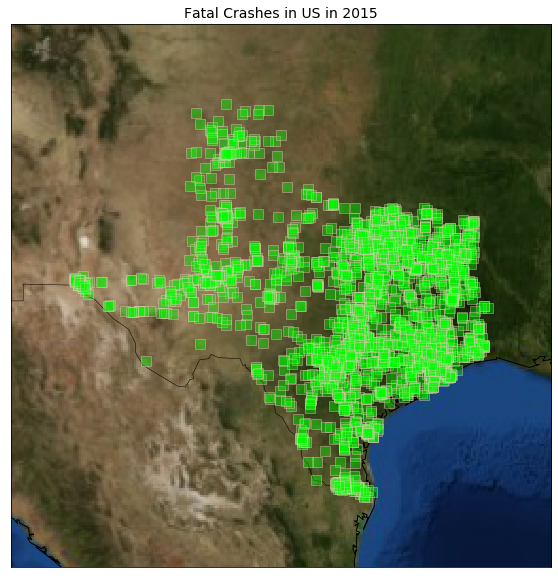

In [33]:
my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
my_map.bluemarble()

# To collect data based on fatality        
xs,ys = my_map(np.asarray(dbscan_df.longitude), np.asarray(dbscan_df.latitude))
dbscan_df['xm']= xs.tolist()
dbscan_df['ym'] =ys.tolist()

# Visualization1
for index,row in dbscan_df.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor ='lime',markeredgecolor='pink', marker='s', markersize= 10, alpha = 0.4)
# plt.text(x,y,stn)
plt.title("Fatal Crashes in Texas in 2015", fontsize=14)
# plt.savefig("Canada_WS.png", dpi=300)
plt.show()

# DBSCAN clustering

In [51]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

le = preprocessing.LabelEncoder()
dbscan_df["weather_encoded"] = le.fit_transform(dbscan_df.atmospheric_conditions_name)
weather_df_clus_temp = dbscan_df[["weather_encoded", "xm", "ym"]]
weather_df_clus_temp = StandardScaler().fit_transform(weather_df_clus_temp)

db = DBSCAN(eps=0.3, min_samples=10).fit(weather_df_clus_temp)
labels = db.labels_
print (labels[500:560])
dbscan_df["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

[ 0  0  0  1  0  0  6  0  1  1  0  0  0  0  0  0  0  0  1  0  1 -1  0  1
  0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  1  1  1  0  1  0  0  2  0
  0  2  1  1  0  0  0  0  0  0  0 -1]


C:\Users\tsbloxsom\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\tsbloxsom\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [53]:
list(le.classes_)

['Blowing Sand, Soil, Dirt',
 'Clear',
 'Cloudy',
 'Fog, Smog, Smoke',
 'Not Reported',
 'Other',
 'Rain',
 'Severe Crosswinds',
 'Sleet, Hail',
 'Snow',
 'Unknown']

Cluster 0,  most common weather condition: 1
Cluster 1,  most common weather condition: 1
Cluster 2,  most common weather condition: 1
Cluster 3,  most common weather condition: 1
Cluster 4,  most common weather condition: 1
Cluster 5,  most common weather condition: 1
Cluster 6,  most common weather condition: 1
Cluster 7,  most common weather condition: 1
Cluster 8,  most common weather condition: 1
Cluster 9,  most common weather condition: 1
Cluster 10,  most common weather condition: 1
Cluster 11,  most common weather condition: 1
Cluster 12,  most common weather condition: 1


Text(0.5, 1.0, 'traffic fatalities in Texas Clustered (1): $ \\epsilon = 0.3$')

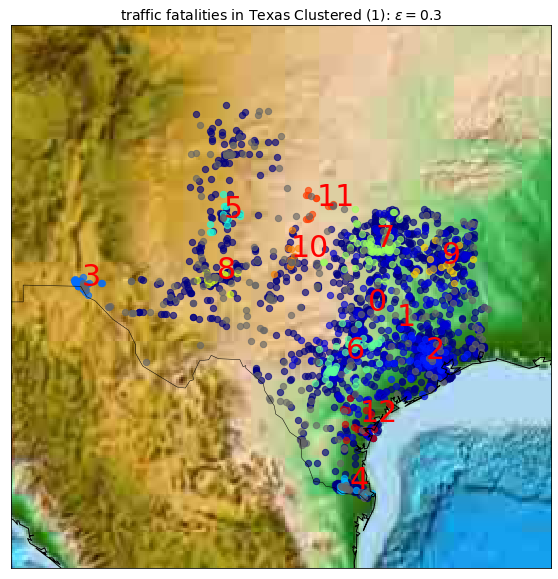

In [56]:
my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
#my_map.bluemarble()
#my_map.shadedrelief()
my_map.etopo()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

# Visualization2
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = dbscan_df[dbscan_df.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 40, alpha = 0.65)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=30, color='red',)
        print("Cluster "+str(clust_number)+',  most common weather condition: '+ \
              str(dbscan_df["weather_encoded"].value_counts().idxmax()))
        
plt.title(r"traffic fatalities in Texas Clustered (1): $ \epsilon = 0.3$", fontsize=14)        
# plt.savefig("etopo_cluster.png", dpi=300)

### looks like it is hard for DBSCAN to cluster effectively when the majority of crashes are on clear days

# DBSCAN without most common and outlier weather conditions

In [57]:
dbscan_df["atmospheric_conditions_name"].value_counts()

Clear                       2216
Cloudy                       621
Rain                         272
Fog, Smog, Smoke              43
Sleet, Hail                   14
Snow                          10
Unknown                        8
Severe Crosswinds              2
Not Reported                   2
Blowing Sand, Soil, Dirt       1
Other                          1
Name: atmospheric_conditions_name, dtype: int64

In [63]:
mask = np.logical_not(dbscan_df["atmospheric_conditions_name"].isin(["Clear", "Cloudy", "Unknown", "Other", "Other"]))
dbscan_df2 = dbscan_df[mask]

In [64]:
dbscan_df2["atmospheric_conditions_name"].value_counts()

Rain                        272
Fog, Smog, Smoke             43
Sleet, Hail                  14
Snow                         10
Not Reported                  2
Severe Crosswinds             2
Blowing Sand, Soil, Dirt      1
Name: atmospheric_conditions_name, dtype: int64

In [68]:
dbscan_df2["weather_encoded"] = le.fit_transform(dbscan_df2.atmospheric_conditions_name)
weather_df_clus_temp = dbscan_df2[["weather_encoded", "xm", "ym"]]
weather_df_clus_temp = StandardScaler().fit_transform(weather_df_clus_temp)

db = DBSCAN(eps=0.3, min_samples=10).fit(weather_df_clus_temp)
labels = db.labels_
# print (labels[500:560])
dbscan_df2["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

set(labels)

{-1, 0, 1, 2, 3, 4, 5}

In [69]:
list(le.classes_)

['Blowing Sand, Soil, Dirt',
 'Fog, Smog, Smoke',
 'Not Reported',
 'Rain',
 'Severe Crosswinds',
 'Sleet, Hail',
 'Snow']

Cluster 0,  most common weather condition: 3
Cluster 1,  most common weather condition: 3
Cluster 2,  most common weather condition: 3
Cluster 3,  most common weather condition: 3
Cluster 4,  most common weather condition: 3
Cluster 5,  most common weather condition: 3


Text(0.5, 1.0, 'traffic fatalities in Texas Clustered (1): $ \\epsilon = 0.3$')

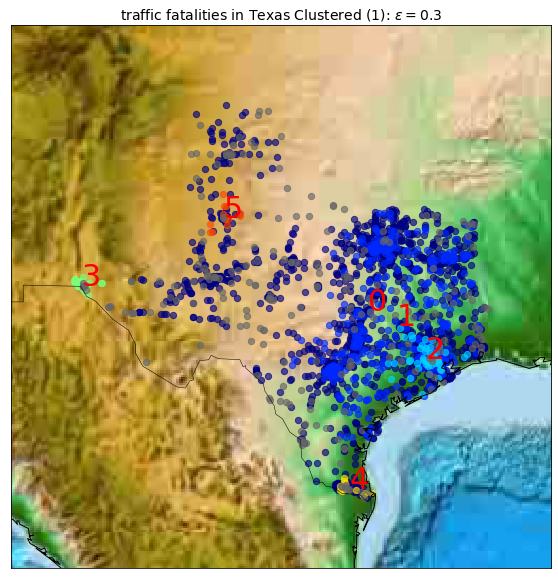

In [71]:
my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
#my_map.bluemarble()
#my_map.shadedrelief()
my_map.etopo()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

# Visualization2
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = dbscan_df[dbscan_df.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 40, alpha = 0.65)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=30, color='red',)
        print("Cluster "+str(clust_number)+',  most common weather condition: '+ \
              str(dbscan_df2["weather_encoded"].value_counts().idxmax()))
        
plt.title(r"traffic fatalities in Texas Clustered (1): $ \epsilon = 0.3$", fontsize=14)        
# plt.savefig("etopo_cluster.png", dpi=300)